## This work is in collaboration with the air pollution laboratory of the department of mining engineering, IIT Kharagpur. I belong to the same department from clean coal technology laboratory. They have collected the particulate matter data along with wind speed, relative humidity, and temperature from a location where PM concentration is a high . They have collected the data using 4 low-cost sensors and a highly calibrated sensor (Manufactured by Grimm). This notebook highlights the performance of low-cost sensor with respect to the calibrated sensor, it also analyses the role of the other parameters on the particulate matter.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the sensor data

In [2]:
s1 = pd.read_excel('OPC_N3_Grimm.xlsx', sheet_name="S1")
s2 = pd.read_excel('OPC_N3_Grimm.xlsx', sheet_name="S2")
s3 = pd.read_excel('OPC_N3_Grimm.xlsx', sheet_name="S3")
s4 = pd.read_excel('OPC_N3_Grimm.xlsx', sheet_name="S4")

In [3]:
print(s1.shape,s2.shape,s3.shape,s4.shape)

(927, 9) (927, 9) (927, 9) (927, 9)


In [4]:
s1.head()

,G_pm1,S1_pm1,G_pm2.5,S1_pm2.5,G_pm10,S1_pm10,T,RH,WS
0,39.13,11.303333,85.15,28.438000,373.75,120.299333,36.410000,51.626667,0.370000
1,38.30,11.035862,68.70,26.236897,280.84,85.159310,36.403333,51.300000,0.473333
2,37.68,10.577000,59.91,23.389333,147.01,55.278667,39.510000,47.400000,0.050000
3,37.46,10.869655,56.13,21.732759,118.51,63.413103,39.256667,44.366667,0.143333
4,36.93,10.536000,55.60,19.633000,120.52,45.728000,38.876667,45.286667,0.273333


In [13]:
s1['PM1_ratio'] = s1['S1_pm1']/s1['G_pm1']
s1['PM2.5_ratio'] = s1['S1_pm2.5']/s1['G_pm2.5']
s1['PM10_ratio'] = s1['S1_pm10']/s1['G_pm10']
s2['PM1_ratio'] = s2['S2_pm1']/s2['G_pm1']
s2['PM2.5_ratio'] = s2['S2_pm2.5']/s2['G_pm2.5']
s2['PM10_ratio'] = s2['S2_pm10']/s2['G_pm10']
s3['PM1_ratio'] = s3['S3_pm1']/s3['G_pm1']
s3['PM2.5_ratio'] = s3['S3_pm2.5']/s3['G_pm2.5']
s3['PM10_ratio'] = s3['S3_pm10']/s3['G_pm10']
s4['PM1_ratio'] = s4['S4_pm1']/s4['G_pm1']
s4['PM2.5_ratio'] = s4['S4_pm2.5']/s4['G_pm2.5']
s4['PM10_ratio'] = s4['S4_pm10']/s4['G_pm10']


In [16]:
s1.head()

,G_pm1,S1_pm1,G_pm2.5,S1_pm2.5,G_pm10,S1_pm10,T,RH,WS,PM1_ratio,PM2.5_ratio,PM10_ratio
0,39.13,11.303333,85.15,28.438000,373.75,120.299333,36.410000,51.626667,0.370000,0.288866,0.333975,0.321871
1,38.30,11.035862,68.70,26.236897,280.84,85.159310,36.403333,51.300000,0.473333,0.288143,0.381905,0.303231
2,37.68,10.577000,59.91,23.389333,147.01,55.278667,39.510000,47.400000,0.050000,0.280706,0.390408,0.376020
3,37.46,10.869655,56.13,21.732759,118.51,63.413103,39.256667,44.366667,0.143333,0.290167,0.387186,0.535087
4,36.93,10.536000,55.60,19.633000,120.52,45.728000,38.876667,45.286667,0.273333,0.285297,0.353112,0.379423


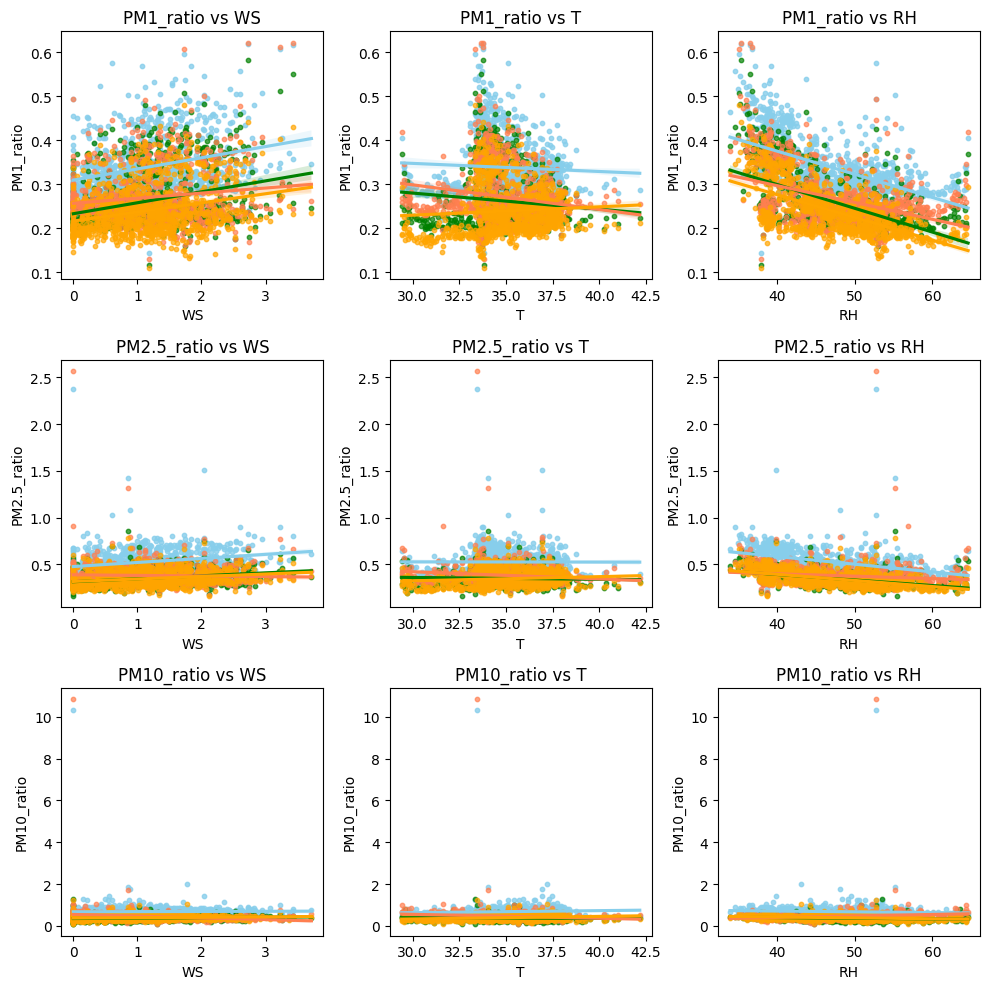

In [49]:
pm_columns = ['PM1_ratio', 'PM2.5_ratio', 'PM10_ratio']
weather_columns = ['WS', 'T', 'RH']

fig, axes = plt.subplots(3, 3, figsize=(10,10))

for i, pm_col in enumerate(pm_columns):
    for j, weather_col in enumerate(weather_columns):
        ax = axes[i, j]
        sns.regplot(data=s1, x=weather_col, y=pm_col, ax=ax, scatter_kws={'s':10,  'color':'skyblue'}, line_kws={'color':'skyblue'})
        sns.regplot(data=s2, x=weather_col, y=pm_col, ax=ax, scatter_kws={'s':10, 'alpha':0.7, 'color':'green'}, line_kws={'color':'green'})
        sns.regplot(data=s3, x=weather_col, y=pm_col, ax=ax, scatter_kws={'s':10, 'alpha':0.7, 'color':'Coral'}, line_kws={'color':'Coral'})
        sns.regplot(data=s4, x=weather_col, y=pm_col, ax=ax, scatter_kws={'s':10, 'alpha':0.7, 'color':'orange'}, line_kws={'color':'orange'})
        ax.set_title(f'{pm_col} vs {weather_col}')


plt.tight_layout()
plt.show()

The plot above illustrates the connection between particulate matter and additional factors like wind speed, temperature, and relative humidity. It's evident that there is a significant variation in the measurements of PM1 across the four sensors, but this variation decreases for PM2.5 and PM10. Moreover, there is an observed increase in PM1 with higher wind speed and a decrease in PM1 with increased relative humidity.

In [81]:
s1_pm1 = s1['S1_pm1'].to_numpy()
s2_pm1 = s2['S2_pm1'].to_numpy()
s3_pm1 = s3['S3_pm1'].to_numpy()
s4_pm1 = s4['S4_pm1'].to_numpy()
s1_pm25 = s1['S1_pm2.5'].to_numpy()
s2_pm25 = s2['S2_pm2.5'].to_numpy()
s3_pm25 = s3['S3_pm2.5'].to_numpy()
s4_pm25 = s4['S4_pm2.5'].to_numpy()
s1_pm10 = s1['S1_pm10'].to_numpy()
s2_pm10 = s2['S2_pm10'].to_numpy()
s3_pm10 = s3['S3_pm10'].to_numpy()
s4_pm10 = s4['S4_pm10'].to_numpy()
WS = s1['WS'].to_numpy()
RH = s1['RH'].to_numpy()
T = s1['T'].to_numpy()

X1 = np.column_stack((s1_pm1,s2_pm1,s3_pm1,s4_pm1,WS,RH,T))
X2 = np.column_stack((s1_pm25,s2_pm25,s3_pm25,s4_pm25,WS,RH,T))
X3 = np.column_stack((s1_pm10,s2_pm10,s3_pm10,s4_pm10,WS,RH,T))
Y1 = s1['G_pm1'].to_numpy()
Y2 = s1['G_pm2.5'].to_numpy()
Y3 = s1['G_pm10'].to_numpy()

# PM1

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=0.1, random_state=0)
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

In [91]:
print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(834, 7) (93, 7) (834,) (93,)


In [104]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch")

X1_train = torch.tensor(X1_train, dtype=torch.float32).clone().detach()
Y1_train = torch.tensor(Y1_train, dtype=torch.float32).clone().detach()
X1_test = torch.tensor(X1_test, dtype=torch.float32).clone().detach()
Y1_test = torch.tensor(Y1_test, dtype=torch.float32).clone().detach()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 500  
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X1_train)
    loss = criterion(outputs, Y1_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:  
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
model.eval()
with torch.no_grad():
    test_outputs = model(X1_test)
    test_loss = criterion(test_outputs, Y1_test)
    print(f'Test Loss (MSE): {test_loss.item()}')
    mae = torch.abs(test_outputs - Y1_test).mean()
    print(f'Test MAE: {mae.item()}')


C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\3667108613.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X1_train = torch.tensor(X1_train, dtype=torch.float32).clone().detach()
C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\3667108613.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y1_train = torch.tensor(Y1_train, dtype=torch.float32).clone().detach()
C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\3667108613.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X1_test = torch.tensor(X1_test, dtype=torch.float32).clon

Epoch [10/500], Loss: 728.4428100585938
Epoch [20/500], Loss: 270.13287353515625
Epoch [30/500], Loss: 184.43826293945312
Epoch [40/500], Loss: 145.01609802246094
Epoch [50/500], Loss: 129.54852294921875
Epoch [60/500], Loss: 117.0718994140625
Epoch [70/500], Loss: 108.86245727539062
Epoch [80/500], Loss: 103.73859405517578
Epoch [90/500], Loss: 100.74868774414062
Epoch [100/500], Loss: 98.89674377441406
Epoch [110/500], Loss: 97.72588348388672
Epoch [120/500], Loss: 96.96176147460938
Epoch [130/500], Loss: 96.45556640625
Epoch [140/500], Loss: 96.10382080078125
Epoch [150/500], Loss: 95.8543472290039
Epoch [160/500], Loss: 95.66925048828125
Epoch [170/500], Loss: 95.52820587158203
Epoch [180/500], Loss: 95.41860961914062
Epoch [190/500], Loss: 95.33387756347656
Epoch [200/500], Loss: 95.26795959472656
Epoch [210/500], Loss: 95.21641540527344
Epoch [220/500], Loss: 95.1763687133789
Epoch [230/500], Loss: 95.14558410644531
Epoch [240/500], Loss: 95.12166595458984
Epoch [250/500], Loss: 

#  Using the same neural network for PM2.5

In [105]:
scaler2 = StandardScaler()

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size=0.1, random_state=0)
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)
print(X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape)

(834, 7) (93, 7) (834,) (93,)


In [113]:
X2_train = torch.tensor(X2_train, dtype=torch.float32).clone().detach()
Y2_train = torch.tensor(Y2_train, dtype=torch.float32).clone().detach()

X2_test = torch.tensor(X2_test, dtype=torch.float32).clone().detach()
Y2_test = torch.tensor(Y2_test, dtype=torch.float32).clone().detach()

model = Net()

optimizer = optim.Adam(model.parameters(), lr=0.01)  
num_epochs = 500  

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X2_train)
    loss = criterion(outputs, Y2_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    test_outputs = model(X2_test)
    test_loss = criterion(test_outputs, Y2_test)
    print(f'New Test Loss (MSE): {test_loss.item()}')
    mae = torch.abs(test_outputs - Y2_test).mean()
    print(f'New Test MAE: {mae.item()}')


C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\3282785374.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X2_train = torch.tensor(X2_train, dtype=torch.float32).clone().detach()
C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\3282785374.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y2_train = torch.tensor(Y2_train, dtype=torch.float32).clone().detach()
C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\3282785374.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X2_test = torch.tensor(X2_test, dtype=torch.float32).clone

Epoch [10/500], Loss: 4630.20361328125
Epoch [20/500], Loss: 2805.94189453125
Epoch [30/500], Loss: 2271.4267578125
Epoch [40/500], Loss: 1911.3446044921875
Epoch [50/500], Loss: 1834.9410400390625
Epoch [60/500], Loss: 1789.2718505859375
Epoch [70/500], Loss: 1739.8985595703125
Epoch [80/500], Loss: 1706.9080810546875
Epoch [90/500], Loss: 1686.396240234375
Epoch [100/500], Loss: 1672.4866943359375
Epoch [110/500], Loss: 1662.7662353515625
Epoch [120/500], Loss: 1656.5440673828125
Epoch [130/500], Loss: 1652.1883544921875
Epoch [140/500], Loss: 1648.947998046875
Epoch [150/500], Loss: 1646.6173095703125
Epoch [160/500], Loss: 1644.9990234375
Epoch [170/500], Loss: 1643.9259033203125
Epoch [180/500], Loss: 1643.098388671875
Epoch [190/500], Loss: 1642.434814453125
Epoch [200/500], Loss: 1641.8892822265625
Epoch [210/500], Loss: 1641.4359130859375
Epoch [220/500], Loss: 1641.050537109375
Epoch [230/500], Loss: 1640.724853515625
Epoch [240/500], Loss: 1640.4573974609375
Epoch [250/500], 

#  Similarly for PM10

In [114]:
scaler3 = StandardScaler()

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3, test_size=0.1, random_state=0)
X3_train = scaler3.fit_transform(X3_train)
X3_test = scaler3.transform(X3_test)
print(X3_train.shape,X3_test.shape,Y3_train.shape,Y3_test.shape)

(834, 7) (93, 7) (834,) (93,)


In [118]:
X3_train = torch.tensor(X3_train, dtype=torch.float32).clone().detach()
Y3_train = torch.tensor(Y3_train, dtype=torch.float32).clone().detach()

X3_test = torch.tensor(X3_test, dtype=torch.float32).clone().detach()
Y3_test = torch.tensor(Y3_test, dtype=torch.float32).clone().detach()

model = Net()

optimizer = optim.Adam(model.parameters(), lr=0.01)  
num_epochs = 500  

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X2_train)
    loss = criterion(outputs, Y2_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

model.eval()
with torch.no_grad():
    test_outputs = model(X2_test)
    test_loss = criterion(test_outputs, Y2_test)
    print(f'New Test Loss (MSE): {test_loss.item()}')
    mae = torch.abs(test_outputs - Y2_test).mean()
    print(f'New Test MAE: {mae.item()}')


C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\2379246360.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X3_train = torch.tensor(X3_train, dtype=torch.float32).clone().detach()
C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\2379246360.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y3_train = torch.tensor(Y3_train, dtype=torch.float32).clone().detach()
C:\Users\Yasaswy\AppData\Local\Temp\ipykernel_8400\2379246360.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X3_test = torch.tensor(X3_test, dtype=torch.float32).clone

Epoch [10/500], Loss: 4879.5732421875
Epoch [20/500], Loss: 3693.94091796875
Epoch [30/500], Loss: 2240.350830078125
Epoch [40/500], Loss: 2078.6064453125
Epoch [50/500], Loss: 1896.8438720703125
Epoch [60/500], Loss: 1829.4822998046875
Epoch [70/500], Loss: 1781.4136962890625
Epoch [80/500], Loss: 1747.1312255859375
Epoch [90/500], Loss: 1717.3729248046875
Epoch [100/500], Loss: 1694.3062744140625
Epoch [110/500], Loss: 1678.6256103515625
Epoch [120/500], Loss: 1667.3974609375
Epoch [130/500], Loss: 1659.38330078125
Epoch [140/500], Loss: 1653.98828125
Epoch [150/500], Loss: 1650.494384765625
Epoch [160/500], Loss: 1648.046875
Epoch [170/500], Loss: 1646.2314453125
Epoch [180/500], Loss: 1644.982666015625
Epoch [190/500], Loss: 1644.0299072265625
Epoch [200/500], Loss: 1643.2637939453125
Epoch [210/500], Loss: 1642.6715087890625
Epoch [220/500], Loss: 1642.196533203125
Epoch [230/500], Loss: 1641.810791015625
Epoch [240/500], Loss: 1641.48486328125
Epoch [250/500], Loss: 1641.203125
E

#  Using Random Forest on PM1

In [119]:
X1 = np.column_stack((s1_pm1,s2_pm1,s3_pm1,s4_pm1,WS,RH,T))
Y1 = s1['G_pm1'].to_numpy()

In [121]:
X1.shape, Y1.shape

((927, 7), (927,))

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(834, 7) (93, 7) (834,) (93,)


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

regr = RandomForestRegressor(max_depth=25, n_estimators = 1000, random_state = 42)
regr.fit(X_train, y_train)
regr.score(X_train, y_train)
errors = mean_squared_error(regr.predict(X_test), y_test,squared=False)
regr.score(X_train, y_train)
errors_test = mean_squared_error(regr.predict(X_test), y_test,squared=False)
errors_test=round(errors_test,3)
errors_train = mean_squared_error(regr.predict(X_train), y_train,squared=False)
errors_train=round(errors_test,3)
print(errors)

regr.score(X_train, y_train)

3.029617614062135


0.9667901272267843

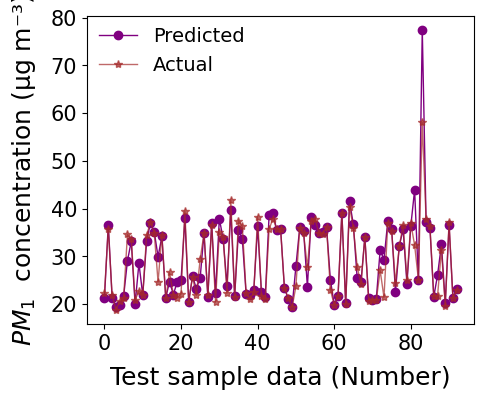

In [132]:
plt.figure(figsize=(5,4))
plt.plot(regr.predict(X_test),color='purple', marker='o',linewidth=1, alpha=1)
plt.plot(y_test,color='brown', marker='*', alpha=0.7,linewidth=1)
plt.xlabel('Test sample data (Number)', color = 'black', fontsize=18, labelpad=9)
plt.ylabel('$PM_{1}$  concentration (\u03BCg m\u207B\u00b3)', fontsize=18, labelpad=9)
plt.plot(figsize=(6,8))
plt.xticks(fontsize=15, color = 'black')
plt.yticks(fontsize=15, color = 'black')
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2,fontsize=14, borderaxespad=0.,labels=['Predicted','Actual'], frameon = False)

plt.show()